In [1]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import os
os.getcwd()


'C:\\Users\\Lenovo'

In [8]:
import pandas as pd

# Replace filename if yours is different
df = pd.read_csv("student_scores.csv")

# Display first 5 rows
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


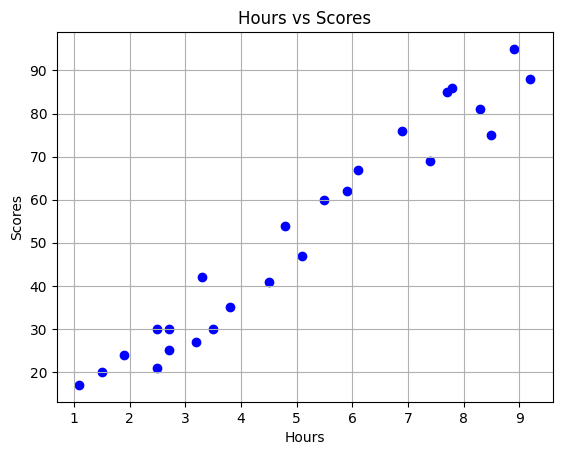

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into X (features) and y (target)
X = df[['Hours']]  # double brackets to keep X as DataFrame
y = df['Scores']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


In [12]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 18.943211722315272
R² Score: 0.9678055545167994


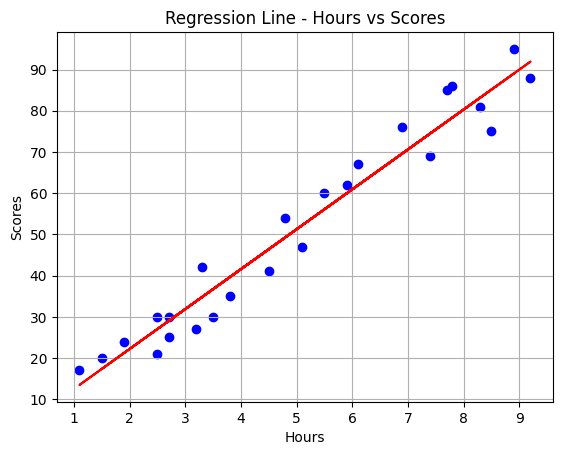

In [13]:
# Plot regression line over scatter plot
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title('Regression Line - Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


In [14]:
from sklearn.preprocessing import PolynomialFeatures


In [15]:
# Change X and y as needed
X = df[['Hours']]
y = df['Scores']

# Generate polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [16]:
# Train the model using polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)


LinearRegression()

In [17]:
y_poly_pred = poly_model.predict(X_poly)


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


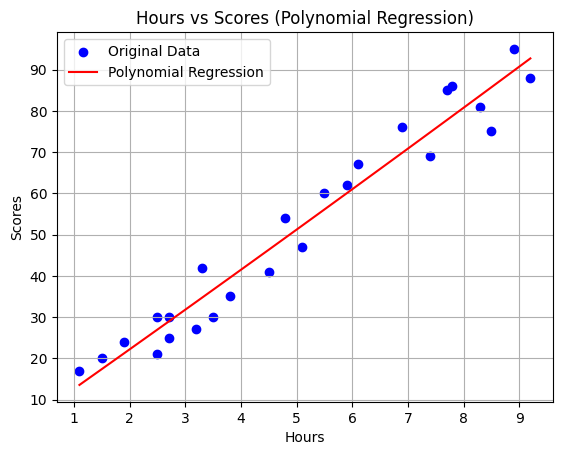

In [18]:
# For smooth curve plotting
import numpy as np
X_sorted = np.sort(X.values, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_sorted_pred = poly_model.predict(X_poly_sorted)

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_sorted, y_sorted_pred, color='red', label='Polynomial Regression')
plt.title('Hours vs Scores (Polynomial Regression)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", r2_score(y, y_poly_pred))
print("MSE:", mean_squared_error(y, y_poly_pred))


R² Score: 0.9529823314098117
MSE: 28.861777057019626


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


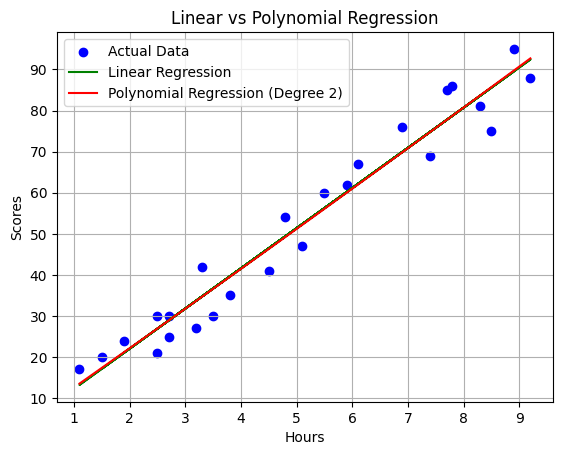

Linear Regression R²: 0.9529481969048356
Polynomial Regression R²: 0.9529823314098117
Linear Regression MSE: 28.882730509245466
Polynomial Regression MSE: 28.861777057019626


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your dataset
df = pd.read_csv("student_scores.csv")  # Replace with your filename
X = df[['Hours']]
y = df['Scores']

# Step 2: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# Step 3: Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# Step 4: Visualization
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_lin_pred, color='green', label='Linear Regression')
plt.plot(X_range, poly_reg.predict(X_range_poly), color='red', label='Polynomial Regression (Degree 2)')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Evaluation Metrics
print("Linear Regression R²:", r2_score(y, y_lin_pred))
print("Polynomial Regression R²:", r2_score(y, y_poly_pred))

print("Linear Regression MSE:", mean_squared_error(y, y_lin_pred))
print("Polynomial Regression MSE:", mean_squared_error(y, y_poly_pred))
